In [13]:
import gym
import d4rl # Import required to register environments
import numpy as np
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

In [15]:
def plot_correlogram(
    data_name="halfcheetah-expert-v2",
    total_trajectory_len=1000,
    kmeans_pca='k-means',
    round_idx=2,
    n_clusters=10
    ):
    # load data
    env = gym.make(data_name)
    dataset = env.get_dataset()
    actions = dataset['actions'][:total_trajectory_len]
    observations = dataset['observations'][:total_trajectory_len]
    rewards = dataset['rewards'][:total_trajectory_len]
    return_to_go = [sum(rewards) if step == 0 else sum(rewards[:-step]) for step in range(total_trajectory_len)]
    return_to_go = np.array(return_to_go)[:, np.newaxis]

    if kmeans_pca == 'pca':
        action_feature = np.round(PCA(n_components=1).fit(actions).transform(actions), round_idx)
        state_feature = np.round(PCA(n_components=1).fit(observations).transform(observations), round_idx)
        return_feature = np.round(PCA(n_components=1).fit(return_to_go).transform(return_to_go), round_idx)

    elif kmeans_pca == 'k-means':
        action_feature = KMeans(n_clusters=n_clusters).fit(actions).fit_predict(actions)
        state_feature = KMeans(n_clusters=n_clusters).fit(observations).fit_predict(observations) + n_clusters  # action, returnとidx混同しないため
        return_feature = KMeans(n_clusters=n_clusters).fit(return_to_go).fit_predict(return_to_go) + int(2 * n_clusters)  # action, stateとidx混同しないため

    else:
        print('No such method')
        
    trajectory = []
    for step in range(total_trajectory_len):
        trajectory.append(action_feature[step])
        trajectory.append(state_feature[step])
        trajectory.append(return_feature[step])
    
    auto_corrs = []
    for lag in tqdm(range(1, len(trajectory) - 1)):
        sequence = pd.Series(np.squeeze(trajectory))
        auto_corr = sequence.autocorr(lag)
        auto_corrs.append(auto_corr)
    
    # plot scatter
    plt.figure(figsize=(20, 10))
    plt.stem(np.arange(1, len(trajectory) - 1), auto_corrs, use_line_collection=True)
    plt.title(data_name)
    
    # plot
    plt.xlabel(f'Distance b/w two data points')
    plt.ylabel(f'Autocorrelation')
    plt.show()

## Plot

### Gym-MuJoCo

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 14.07it/s]


  0%|          | 0/2998 [00:00<?, ?it/s]

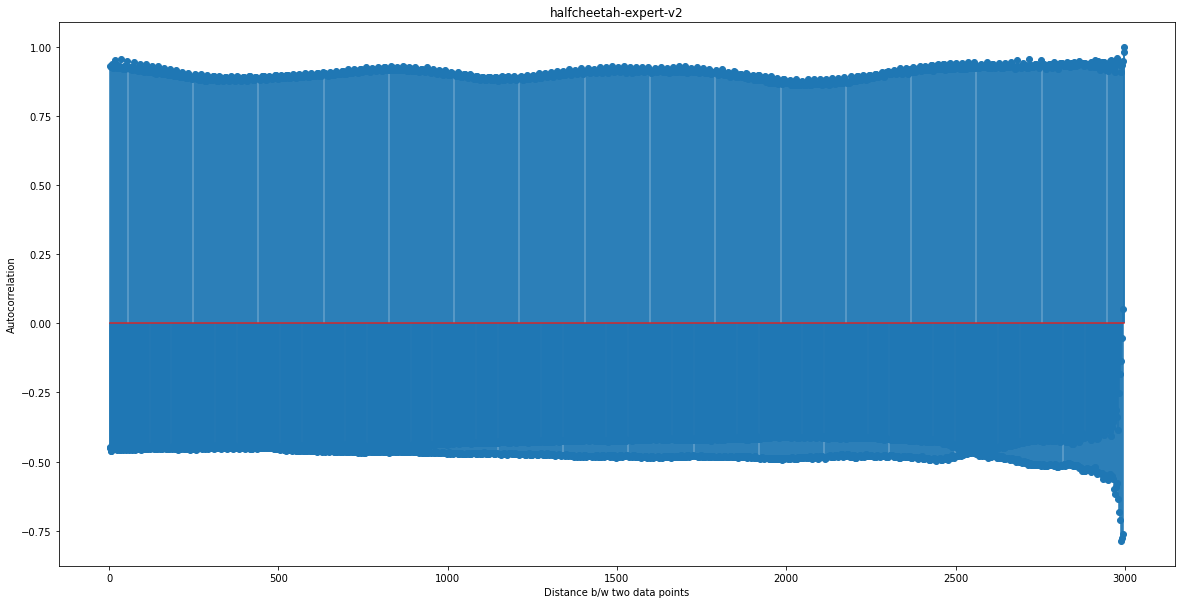

In [21]:
plot_correlogram(
    data_name='halfcheetah-expert-v2',
    total_trajectory_len=1000,
    kmeans_pca='k-means',
    n_clusters=10)

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 14.00it/s]


  0%|          | 0/2998 [00:00<?, ?it/s]

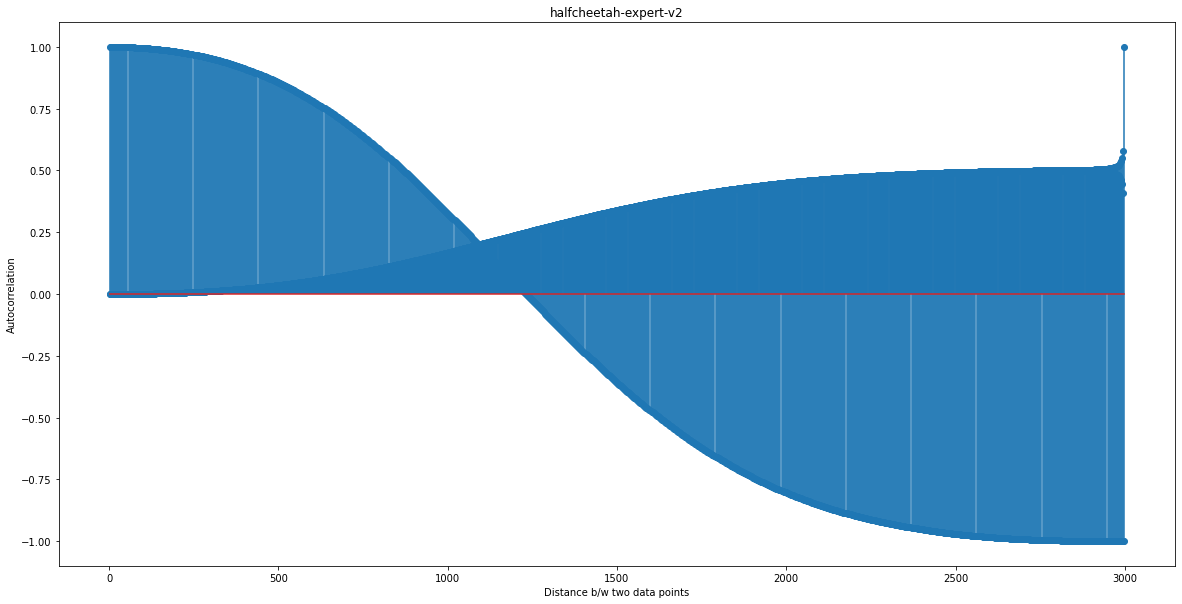

In [24]:
plot_correlogram(
    data_name='halfcheetah-expert-v2',
    total_trajectory_len=1000,
    kmeans_pca='pca',
    n_clusters=10)

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 21.28it/s]


  0%|          | 0/2998 [00:00<?, ?it/s]

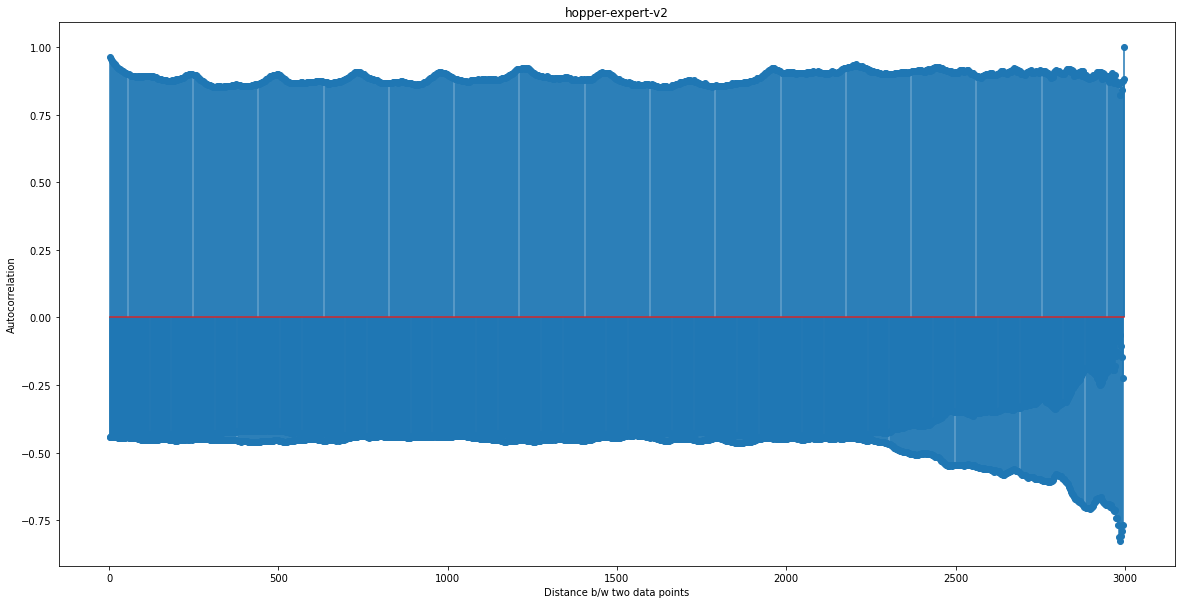

In [25]:
plot_correlogram(
    data_name='hopper-expert-v2',
    total_trajectory_len=1000,
    kmeans_pca='k-means',
    n_clusters=10)

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 21.61it/s]


  0%|          | 0/2998 [00:00<?, ?it/s]

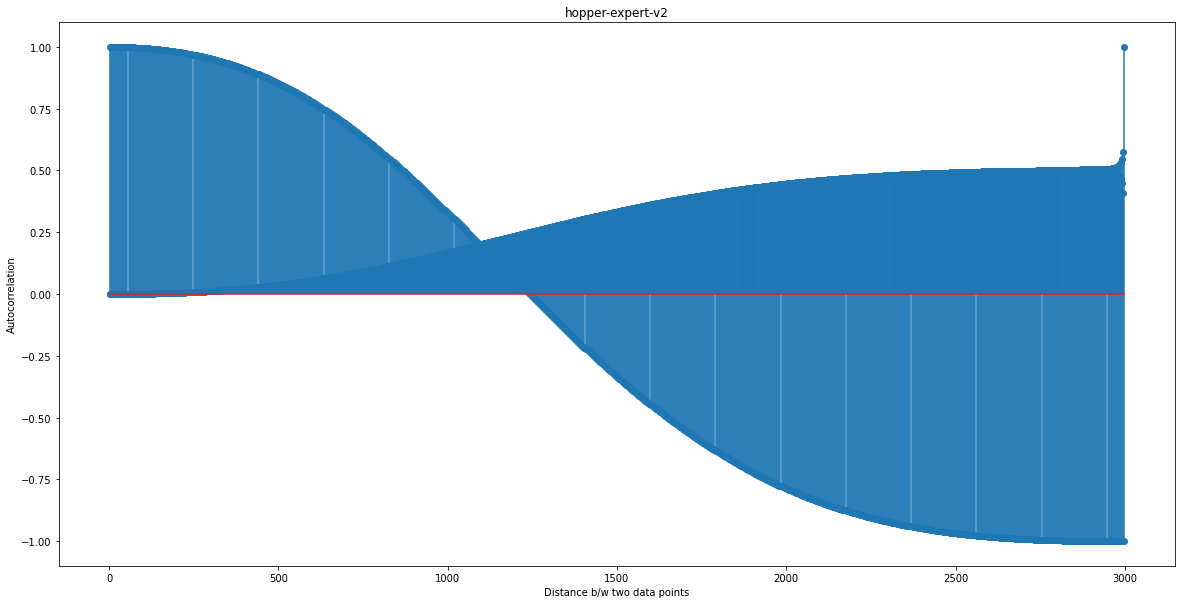

In [26]:
plot_correlogram(
    data_name='hopper-expert-v2',
    total_trajectory_len=1000,
    kmeans_pca='pca',
    n_clusters=10)

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 13.62it/s]


  0%|          | 0/2998 [00:00<?, ?it/s]

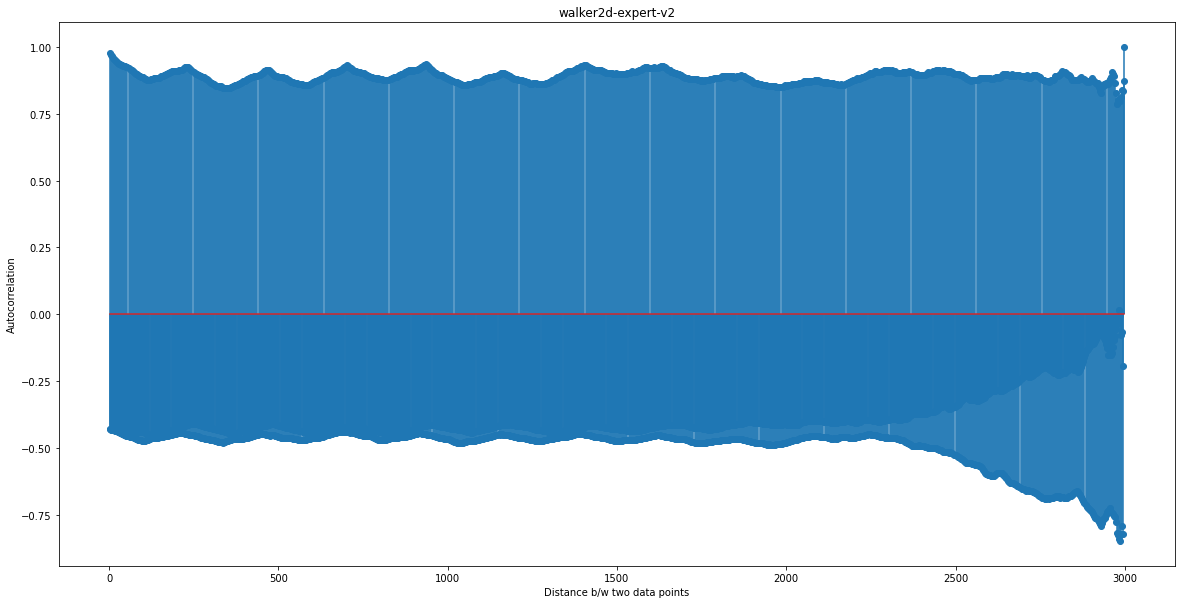

In [29]:
plot_correlogram(
    data_name='walker2d-expert-v2',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='k-means')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 14.19it/s]


  0%|          | 0/2998 [00:00<?, ?it/s]

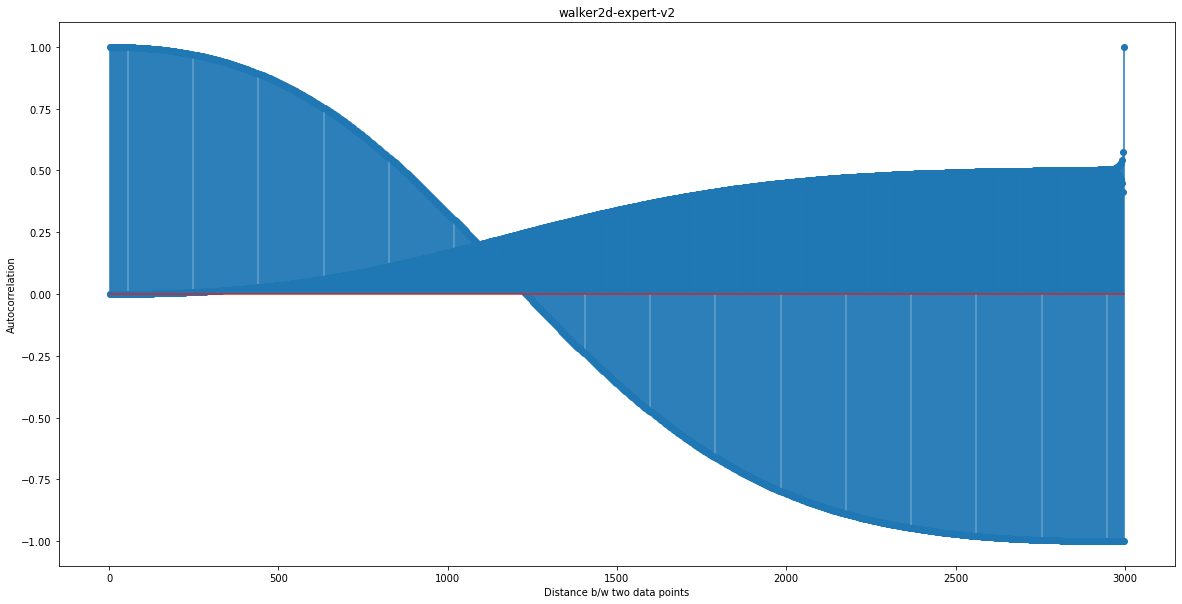

In [ ]:
plot_correlogram(
    data_name='walker2d-expert-v2',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='pca')

### Maze2D

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/envs/registration.py:511: UserWarning: WARN: Using the latest versioned environment `maze2d-large-v1` instead of the unversioned environment `maze2d-large`
  logger.warn(
load datafile: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.77it/s]
/var/folders/vy/byytq3w13zx93_tkz5zl9qsr0000gn/T/ipykernel_6758/2397390441.py:25: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_feature = KMeans(n_clusters=n_clusters).fit(return_to_go).fit_predict(return_to_go) + int(2 * n_clusters)  # action, stateとidx混同しないため
/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate po

  0%|          | 0/2998 [00:00<?, ?it/s]

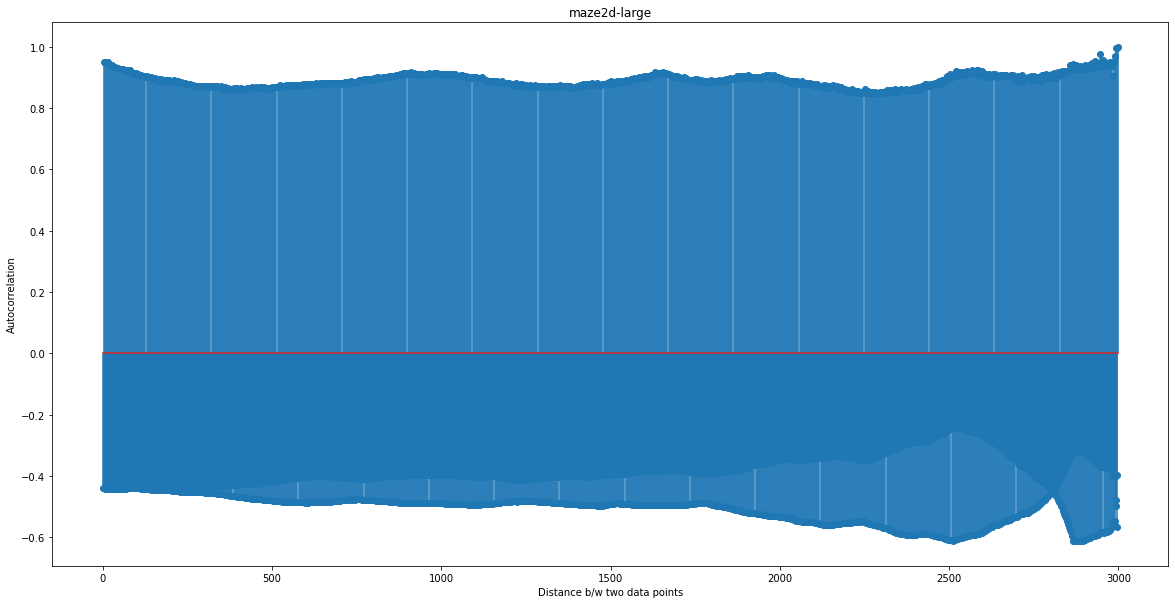

In [33]:
plot_correlogram(
    data_name='maze2d-large',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='k-means')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/envs/registration.py:511: UserWarning: WARN: Using the latest versioned environment `maze2d-large-v1` instead of the unversioned environment `maze2d-large`
  logger.warn(
load datafile: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.78it/s]
/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


  0%|          | 0/2998 [00:00<?, ?it/s]

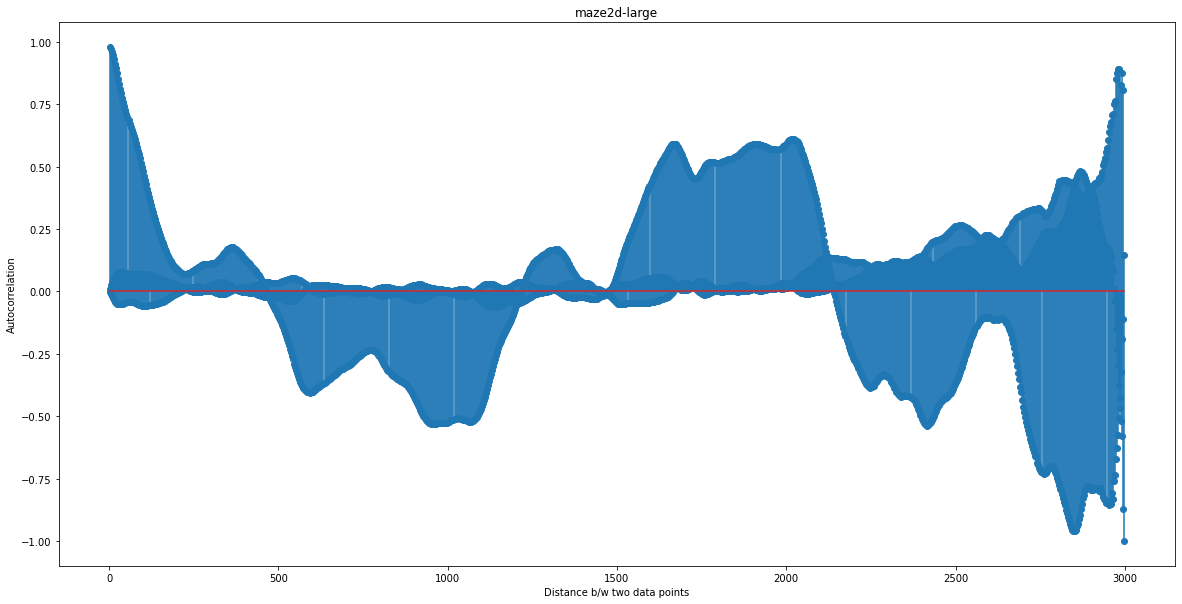

In [35]:
plot_correlogram(
    data_name='maze2d-large',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='pca')

## AntMaze

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/envs/registration.py:511: UserWarning: WARN: Using the latest versioned environment `antmaze-large-play-v2` instead of the unversioned environment `antmaze-large-play`
  logger.warn(
/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Target Goal:  (33.07596056604808, 24.12166672065156)


load datafile: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.27it/s]
/var/folders/vy/byytq3w13zx93_tkz5zl9qsr0000gn/T/ipykernel_6758/2397390441.py:25: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_feature = KMeans(n_clusters=n_clusters).fit(return_to_go).fit_predict(return_to_go) + int(2 * n_clusters)  # action, stateとidx混同しないため
/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


  0%|          | 0/2998 [00:00<?, ?it/s]

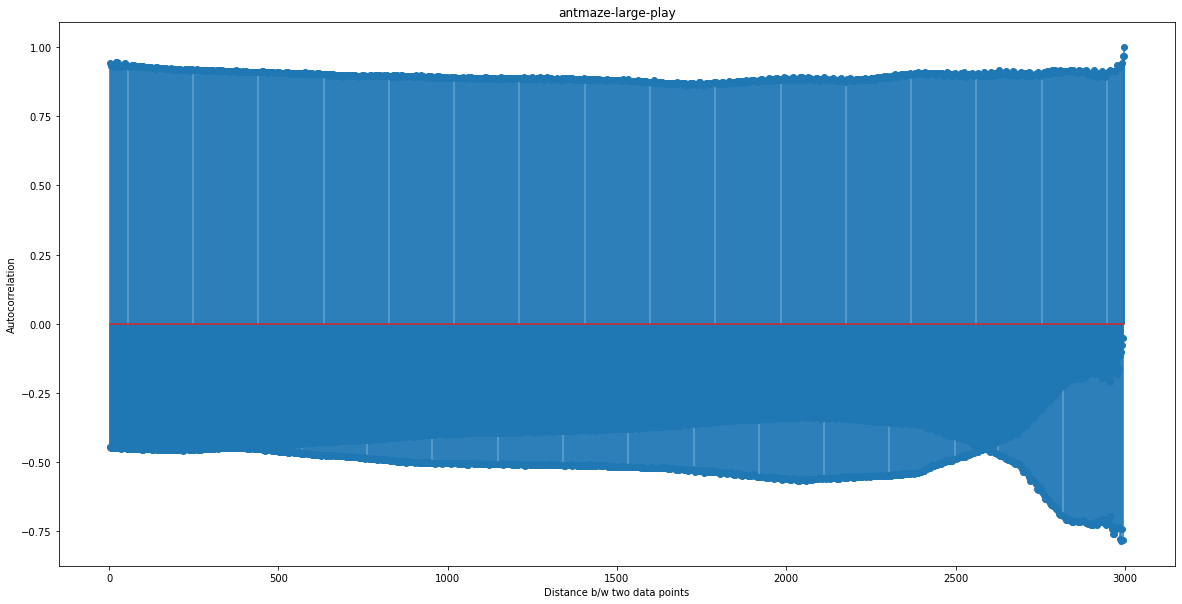

In [37]:
plot_correlogram(
    data_name='antmaze-large-play',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='k-means')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/envs/registration.py:511: UserWarning: WARN: Using the latest versioned environment `antmaze-large-play-v2` instead of the unversioned environment `antmaze-large-play`
  logger.warn(
/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Target Goal:  (33.28752954382707, 24.11798331874636)


load datafile: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.34it/s]
/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


  0%|          | 0/2998 [00:00<?, ?it/s]

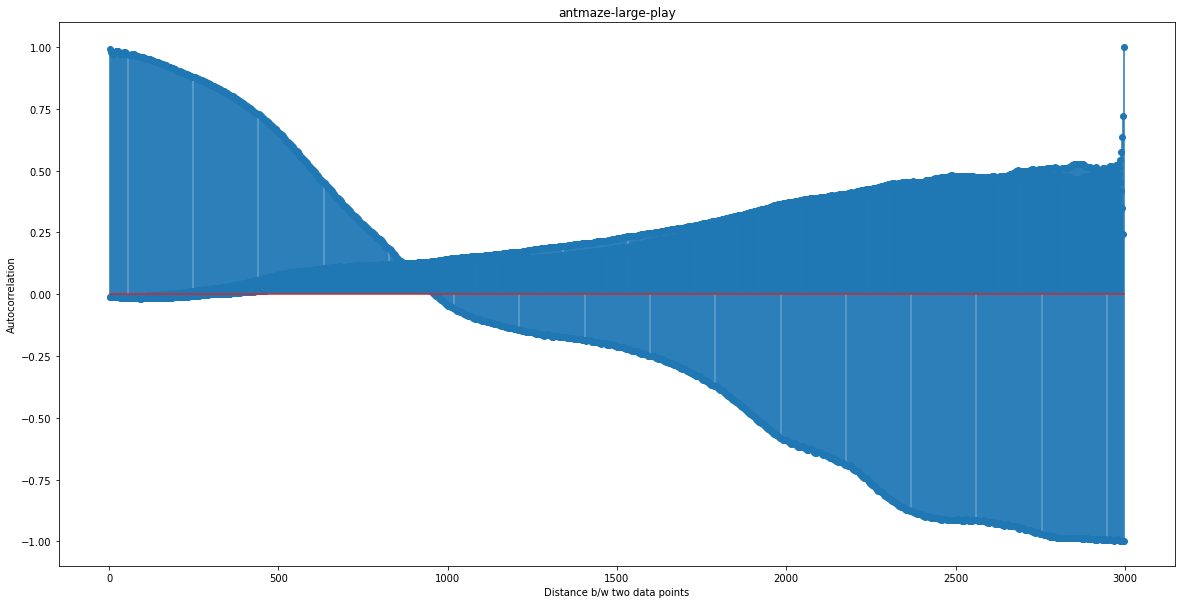

In [38]:
plot_correlogram(
    data_name='antmaze-large-play',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='pca')

## Adroit

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/envs/registration.py:511: UserWarning: WARN: Using the latest versioned environment `relocate-expert-v1` instead of the unversioned environment `relocate-expert`
  logger.warn(
/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.65it/s]


  0%|          | 0/2998 [00:00<?, ?it/s]

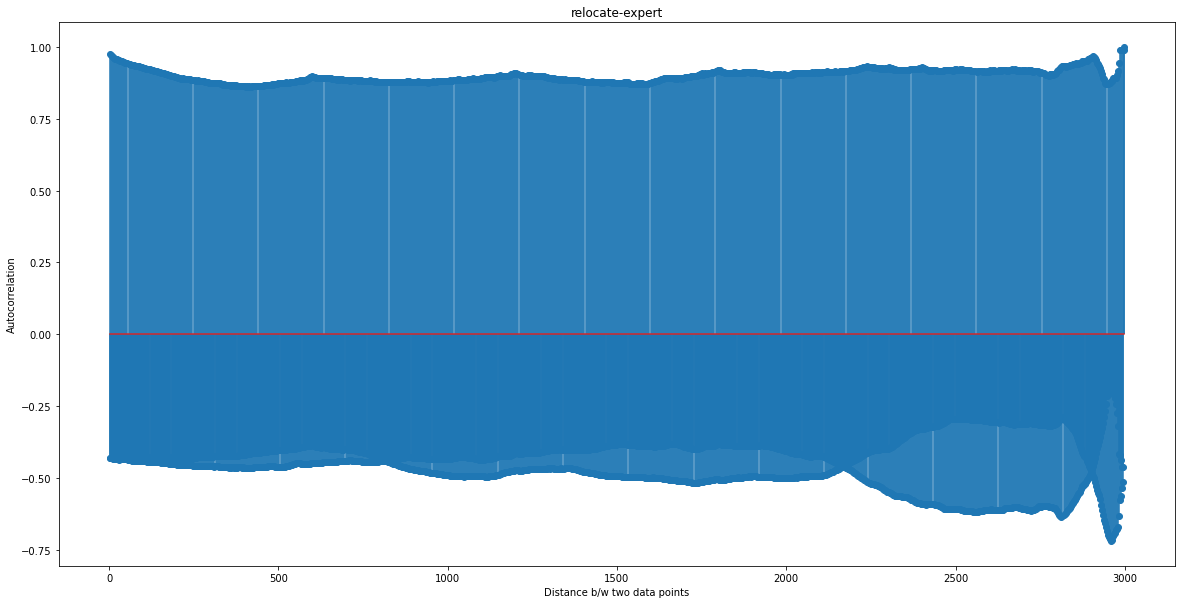

In [39]:
plot_correlogram(
    data_name='relocate-expert',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='k-means')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/envs/registration.py:511: UserWarning: WARN: Using the latest versioned environment `relocate-expert-v1` instead of the unversioned environment `relocate-expert`
  logger.warn(
/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.72it/s]


  0%|          | 0/2998 [00:00<?, ?it/s]

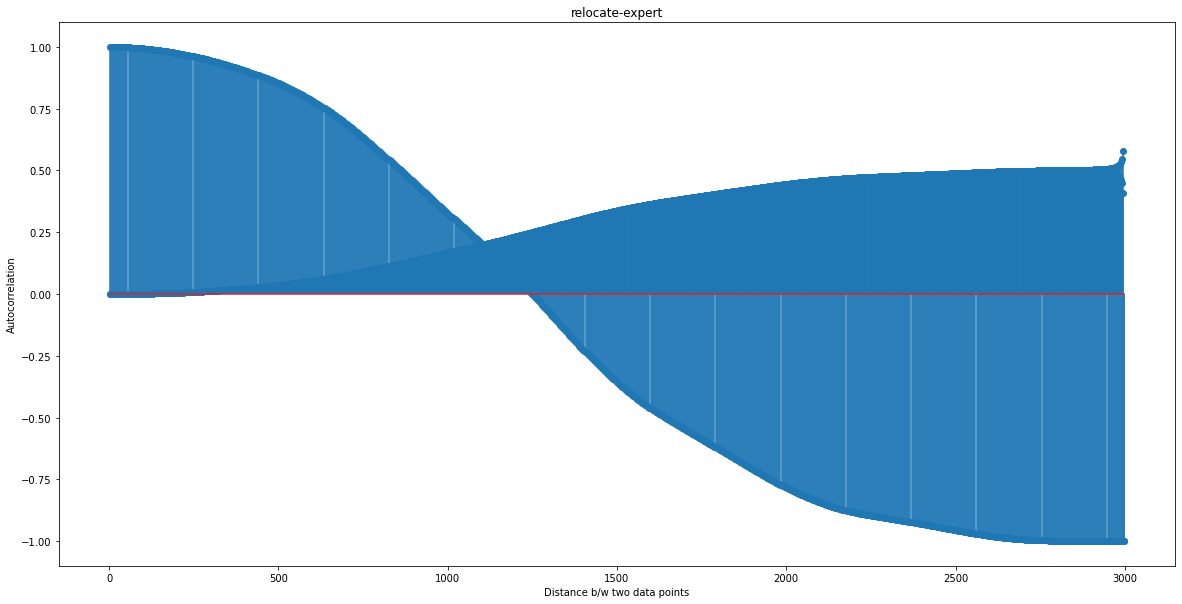

In [41]:
plot_correlogram(
    data_name='relocate-expert',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='pca')

## FrankaKitchen

Reading configurations for Franka
Initializing Franka sim


/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 45.12it/s]


  0%|          | 0/2998 [00:00<?, ?it/s]

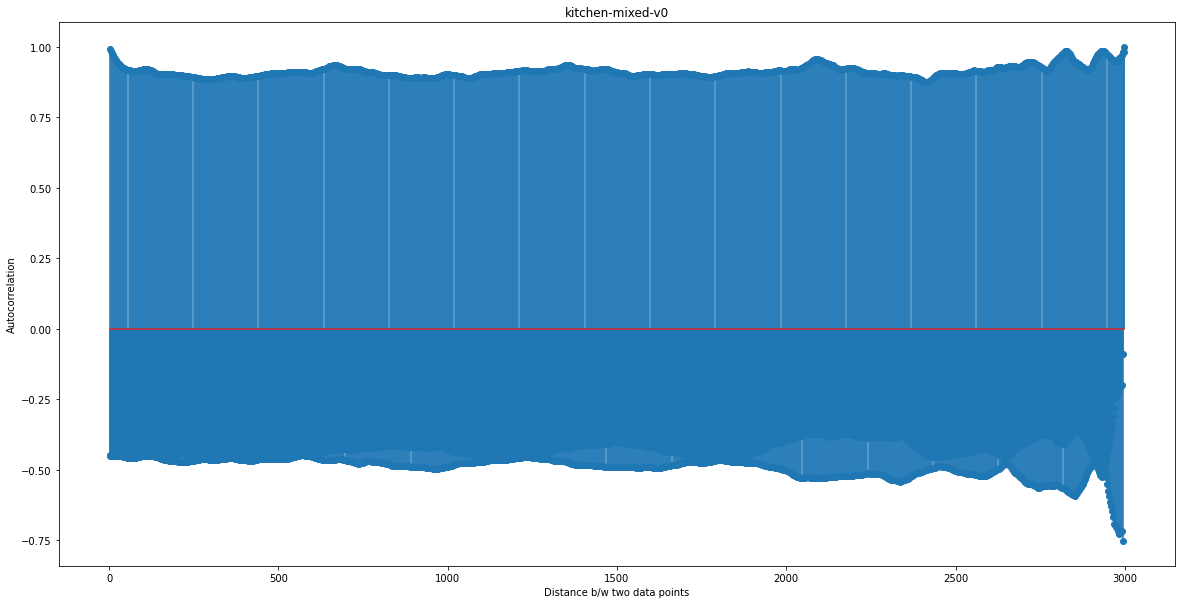

In [42]:
plot_correlogram(
    data_name='kitchen-mixed-v0',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='k-means')

Reading configurations for Franka
Initializing Franka sim


/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 45.60it/s]


  0%|          | 0/2998 [00:00<?, ?it/s]

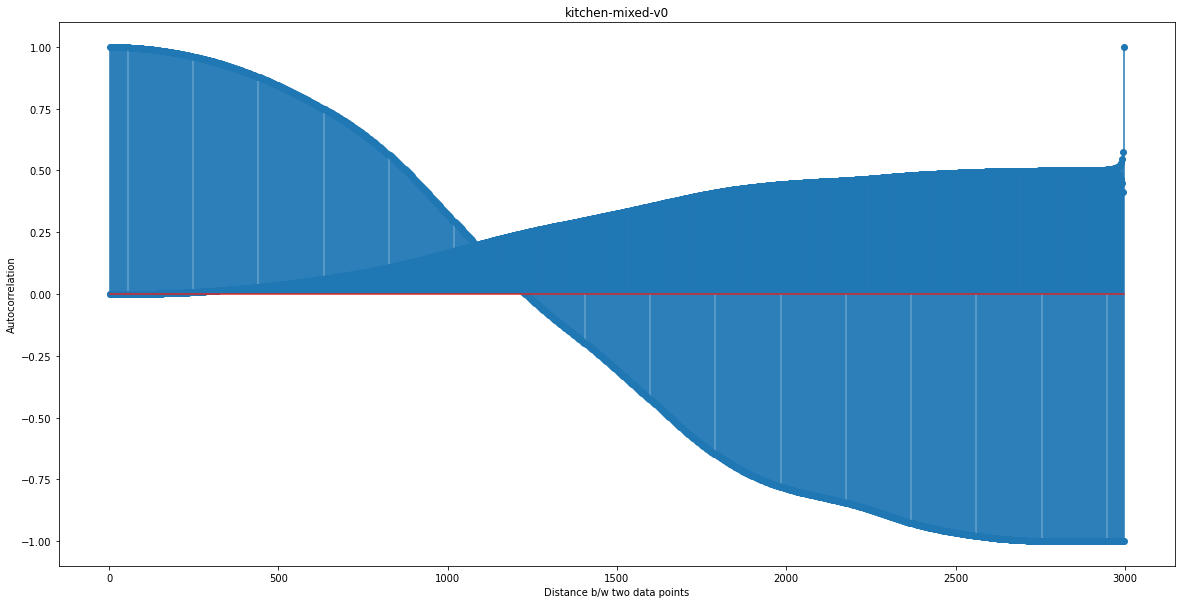

In [43]:
plot_correlogram(
    data_name='kitchen-mixed-v0',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='pca')